In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings(action='ignore')

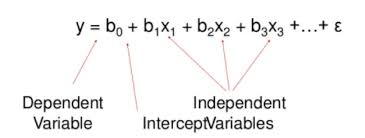

In [49]:
# 다중회귀에서 변수가 많아지면 모델이 복잡해지고 과적합이 되기 쉽다
Image('./data_ml/다중회귀식.jpg')

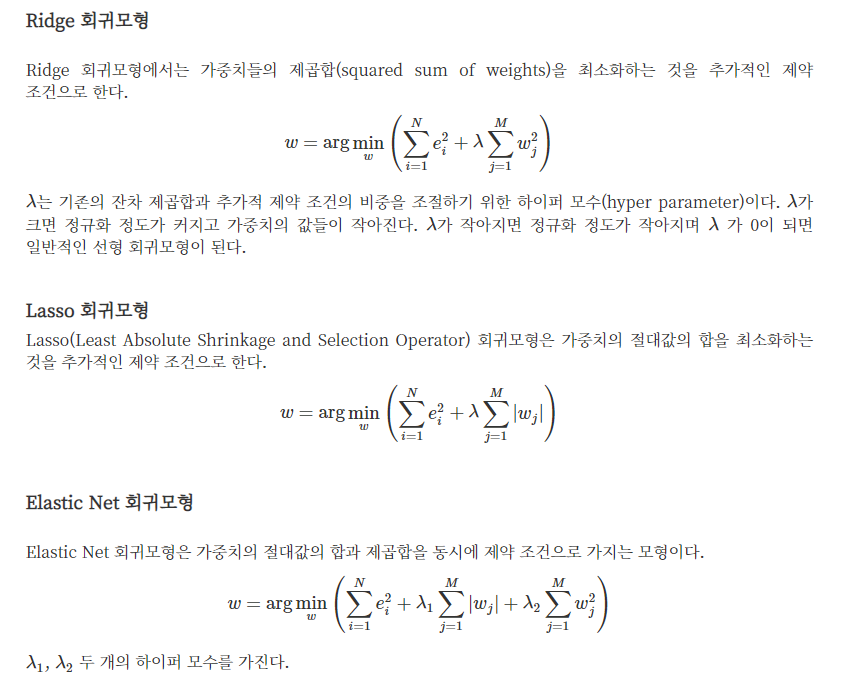

In [50]:
from IPython.display import Image
Image('./data_ml/ridge_lasso_1.png')

In [51]:
# !pip install mglearn
import mglearn

In [52]:
# x,y =mglearn.datasets.make_wave(n_samples=60)

In [53]:
x,y = mglearn.datasets.load_extended_boston()

In [54]:
x[:5]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.24000000e-02, 1.22067449e-02,
        0.00000000e+00, 5.66666667e-02, 1.03950948e-01, 1.15489186e-01,
        4.84565650e-02, 0.00000000e+00, 3.74427481e-02, 5.17021277e-02,
        1.80000000e-01, 1.61423841e-02, 4.59890803e-03, 0.00000000e+00,
        2.13492451e-02, 3.91636638e-02, 4.35107109e-02, 1.82560780e-02,
        0.00000000e+00, 1.41066072e-02, 1.94788482e-02, 6.78152493e-02,
        6.08166557e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [55]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [56]:
# y = wx+ b

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=111)

In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

print('train acc : ',lr.score(x_train,y_train))  #train 정확도가 더 높게 나옴
print('test acc : ',lr.score(x_test,y_test))

# train data의 정확도와 test data의 정확도 차이가 크다 => 과적합의 가능성 높음

train acc :  0.9271719885630869
test acc :  0.8829557441679036


In [60]:
# Ridge, Lasso, Elasticnet

In [61]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [62]:
# alpha가 0 이면 그냥 회귀식과 같은 결과
rid = Ridge(alpha=0)
rid.fit(x_train, y_train)
print('train acc : ',rid.score(x_train,y_train)) 
print('test acc : ',rid.score(x_test,y_test))

train acc :  0.9271719885630869
test acc :  0.8829557441679852


In [63]:
rid = Ridge(alpha=0.01)
rid.fit(x_train, y_train)
print('train acc : ',rid.score(x_train,y_train))  
print('test acc : ',rid.score(x_test,y_test))

train acc :  0.9183149605914149
test acc :  0.8972656713361552


In [64]:
rid = Ridge(alpha=1)
rid.fit(x_train, y_train)
print('train acc : ',rid.score(x_train,y_train))  
print('test acc : ',rid.score(x_test,y_test))

train acc :  0.8447140760472505
test acc :  0.871934460988592


In [65]:
rid = Ridge(alpha=0.04)
rid.fit(x_train, y_train)
print('train acc : ',rid.score(x_train,y_train))  
print('test acc : ',rid.score(x_test,y_test))

train acc :  0.9073362874800305
test acc :  0.899473237517284


In [66]:
# 너무 단순해져서 과소적합 단계 : 둘다 떨어짐
rid = Ridge(alpha=10)
rid.fit(x_train, y_train)
print('train acc : ',rid.score(x_train,y_train))  
print('test acc : ',rid.score(x_test,y_test))

train acc :  0.7415059165099132
test acc :  0.7632175493173146


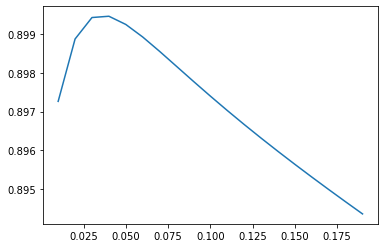

In [67]:
ridge_scores = []

for i in np.arange(0.01,0.2,0.01):
    rid = Ridge(alpha=i)
    rid.fit(x_train,y_train)
    ridge_scores.append(rid.score(x_test,y_test))
    
plt.plot(np.arange(0.01,0.2,0.01),ridge_scores)

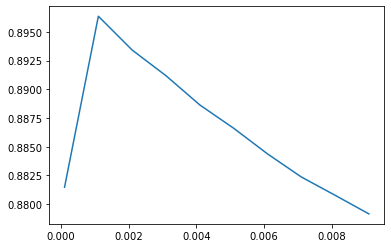

In [68]:
lasso_scores = []

for i in np.arange(0.0001,0.01,0.001):
    las = Lasso(alpha=i)
    las.fit(x_train,y_train)
    lasso_scores.append(las.score(x_test,y_test))
    
plt.plot(np.arange(0.0001,0.01,0.001),lasso_scores)

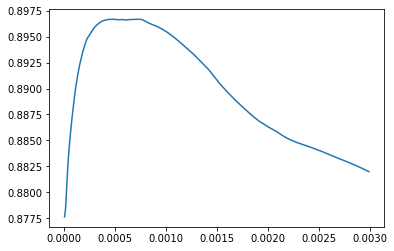

In [69]:
elastic_scores = []

for i in np.arange(0.00001,0.003,0.00001):
    ela = ElasticNet(alpha=i)
    ela.fit(x_train,y_train)
    elastic_scores.append(ela.score(x_test,y_test))
    
plt.plot(np.arange(0.00001,0.003,0.00001), elastic_scores)